
## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.
1. [ ] Question or problem definition.
2. [ ] Acquire training and testing data.
3. [ ] Wrangle, prepare, cleanse the data.
4. [ ] Analyze, identify patterns, and explore the data.
5. [ ] Model, predict and solve the problem.
6. [ ] Visualize, report, and present the problem solving steps and final solution.
7. [ ] Supply or submit the results.

# First Kaggle challenge - Titanic
## Machine Learning from Disaster

- v0.1_112020

- *Author: JuanitoC*

- [Kaggle Titanic challenge] (https://www.kaggle.com/c/titanic/)    

### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
### What Data Will I Use in This Competition?
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.
Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.
The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.
Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

In [2]:
## 2a. Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:43:08) [MSC v.1926 32 bit (Intel)]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


***
# Import Libraries

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

In [4]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
#from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***
# Load dataset

### Kaggle provee dos datasets: train y test

#### En el caso de realizar la conexión con la API de Kaggle


!chmod 600 /home/JuanitoC/.kaggle/kaggle.json

Una vez habilitados los permisos a la carpeta `.kaggle` lanzamos esta linea de comando API

!Kaggle competitions download -c titanic


Necesitamos ahora descomprimir el fichero.zip

!unzip -o titanic.zip

In [6]:
## Load dataset
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

#Necesitamos separar los Ids de los pasajeros para utilizarlos al final del modelo de submit
ids = test_dataset['PassengerId']

In [7]:
# Unificamos los dos datasets para podder procesarlos conjuntamente

print(train_dataset.columns)
print(test_dataset.columns)
   
## Si no hacemos el reset index drop=true, python crea otro index   
titanic_list = pd.concat(objs=[train_dataset, test_dataset], axis=0).reset_index()
titanic_list[titanic_list['index'] ==1]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
892,1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [8]:
titanic_list = pd.concat(objs=[train_dataset, test_dataset], axis=0).reset_index(drop=True)
titanic_list.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_dataset.shape, test_dataset.shape

((891, 12), (418, 11))

In [10]:
titanic_list.shape

(1309, 12)

In [11]:
titanic_list.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


***
## EDA, Visualization & Transforming

Realizamos el check de cada atriuto, buscaos valores atípicos, nulos, errores y eventualmente creamos nuevos atributos.

In [12]:
# Check Null y NA para ambos dataset
titanic_list.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
# Check Null y NA para ambos  %
titanic_list.isnull().sum()/len(titanic_list)

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

#### Deberíamos realizar un trabajo de manipulacíon de los datos nulos para `Age`, `Embarked`,`Fare`. Para la variable `Cabin` podemos eliminarla o tratarla.

***
#### Realizamos un check del atributo `PassengerID`

In [14]:
titanic_list['PassengerId'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

No va a aportar ningún valof a nuestro modelo, por lo tanto eliminaremos este atributo

In [16]:
titanic_list.shape
titanic_list.drop(['PassengerId'],
                                axis=1,
                                inplace=True)
titanic_list.shape

(1309, 11)

***
## `Survived`
Nuestra variable predictora o dependiente, verificamos las correctas etiquetas  `0`y `1`, aprox 38%


In [20]:
len(train_dataset)

891

In [21]:
len(test_dataset)

418

<AxesSubplot:xlabel='Survived'>

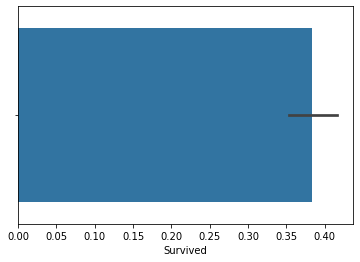

In [22]:
titanic_list['Survived'][:891] = titanic_list['Survived'][:891].astype(int)
sns.barplot(x = "Survived",
           data = titanic_list)

In [23]:
titanic_list.describe()['Survived']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

*** 
`Pclass`

Check ticket class. Es una variable categórica con 3 valores


In [48]:
titanic_list[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

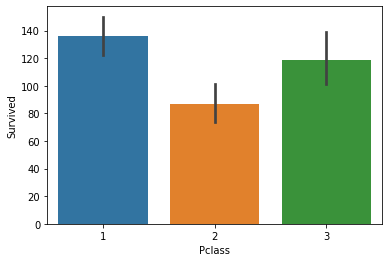

In [47]:
sns.barplot(x='Pclass',
           y='Survived',
           data=titanic_list,
           estimator=np.sum)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

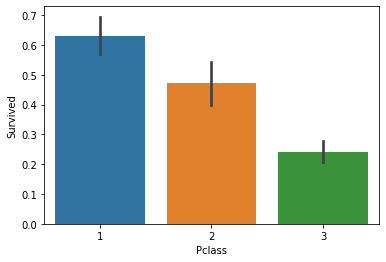

In [49]:
sns.barplot(x='Pclass',
           y='Survived',
           data=titanic_list,
           estimator=np.mean)

***
## `Sex`

In [52]:
# Representamos gráficamente el atributo Sex.
print(titanic_list['Sex'].value_counts(sort=False))

male      843
female    466
Name: Sex, dtype: int64


In [53]:
print(titanic_list['Sex'].value_counts(sort=False,normalize=True))

male      0.644003
female    0.355997
Name: Sex, dtype: float64


Text(0.5, 1.0, 'Survive v/s Sex')

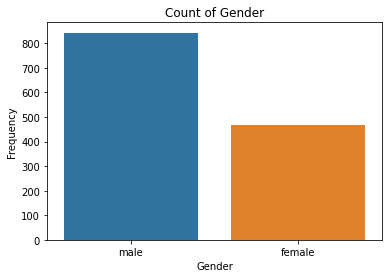

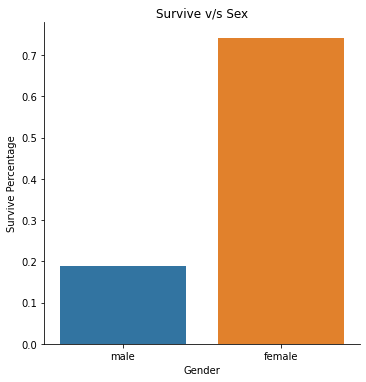

In [54]:
# Visualising counts of Gender with bar graph
sns.countplot(x="Sex", data=titanic_list);
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count of Gender')
# Showing proportion of survival for different type of gender
sns.catplot(x="Sex", y="Survived", data=titanic_list, kind="bar", ci=None)
plt.xlabel('Gender')
plt.ylabel('Survive Percentage')
plt.title('Survive v/s Sex')

In [56]:
titanic_list['Sex1'] = titanic_list['Sex'].map({
    'female':1,
    'male':0
})
titanic_list['Sex1']

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Sex1, Length: 1309, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

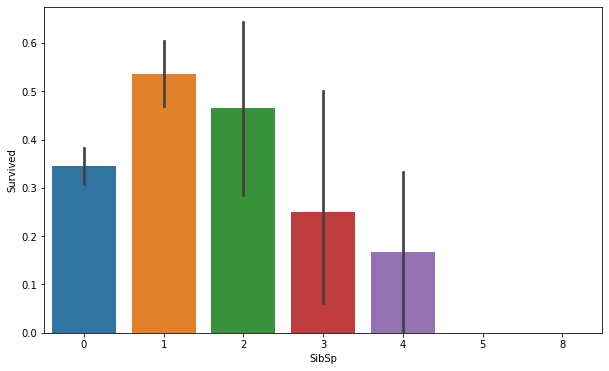

In [58]:
# Plt figure sirve para modificar el tamaño del gráfico.
plt.figure(figsize=[10.0,6.0])
sns.barplot(x="SibSp", y="Survived", data=titanic_list)

***
### `Parch`

***
`Ticket`

In [61]:
##Ticket no aporta informacion

titanic_list['Ticket'].head(10)
titanic_list.drop(['Ticket'],axis=1,inplace=True)

***
## `Embarked`
Tenemos 3 valores `C` Por Cherbourg, `Q` for Queenstown, `S` for Southampton

In [66]:
titanic_list[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [70]:
# Tenemos que tratar los valores nulos. Un método es con el most_frequent
freq_port = titanic_list.Embarked.dropna().mode()[0]
freq_port

0    S
dtype: object

In [69]:
#Asignamos el valor frequente
titanic_list ['Embarked'] = titanic_list['Embarked'].fillna(freq_port)

In [71]:
# Realizamos el check de su distribución
titanic_list['Embarked'].describe()

count     1309
unique       3
top          S
freq       916
Name: Embarked, dtype: object

In [72]:
# Visualizamos la variable Embarked 
titanic_list[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

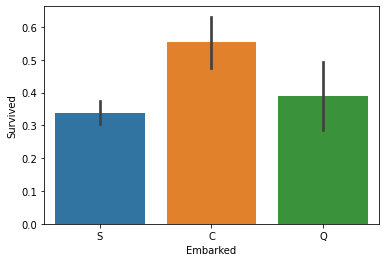

In [73]:
sns.barplot(x="Embarked", y="Survived", data=titanic_list)

***
## `Fare`
Buscamos la distribución de la variable continua

In [74]:
titanic_list['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

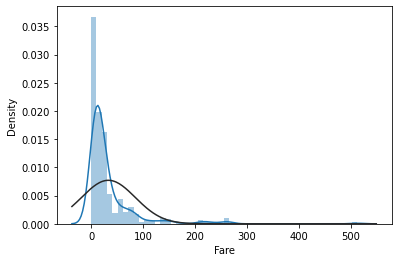

In [78]:
sns.distplot(titanic_list['Fare'],fit=norm)

<AxesSubplot:xlabel='Fare2', ylabel='Density'>

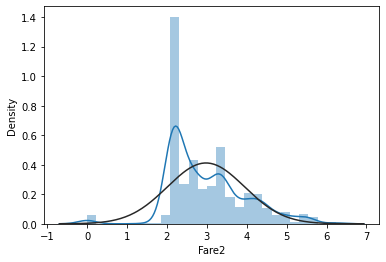

In [81]:
# Para poder normalizar los valores
titanic_list['Fare2'] = np.log1p(titanic_list['Fare'])
sns.distplot(titanic_list['Fare2'],fit=norm)

In [84]:
titanic_list[['Fare2','Fare']].describe()

,Fare2,Fare
count,1308.000000,1308.000000
mean,2.979411,33.295479
std,0.968668,51.758668
min,0.000000,0.000000
25%,2.185579,7.895800
50%,2.737881,14.454200
75%,3.474293,31.275000
max,6.240917,512.329200


In [85]:
titanic_list[['Fare2','Fare']].head()

,Fare2,Fare
0,2.110213,7.2500
1,4.280593,71.2833
2,2.188856,7.9250
3,3.990834,53.1000
4,2.202765,8.0500


In [89]:
titanic_list[titanic_list['Fare'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex1,Fare2
1043,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,NaN,S,0,NaN


In [91]:
titanic_list[titanic_list['Pclass']==3].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex1,Fare2
count,491.000000,709.0,501.000000,709.000000,709.000000,708.000000,709.000000,708.000000
mean,0.242363,3.0,24.816367,0.568406,0.400564,13.302889,0.304654,2.475478
std,0.428949,0.0,11.958202,1.299681,0.981639,11.494358,0.460586,0.552603
min,0.000000,3.0,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.0,18.000000,0.000000,0.000000,7.750000,0.000000,2.169054
50%,0.000000,3.0,24.000000,0.000000,0.000000,8.050000,0.000000,2.202765
75%,0.000000,3.0,32.000000,1.000000,0.000000,15.245800,1.000000,2.787834
max,1.000000,3.0,74.000000,8.000000,9.000000,69.550000,1.000000,4.256322


In [94]:
titanic_list['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64